# Yelp Data Challenge - Data Preprocessing

Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [1]:
import json
import pandas as pd

In [35]:
file_business, file_checkin, file_review, file_tip, file_user = [
    "Downloads/dataset/business.json",
    "Downloads/dataset/checkin.json",
    "Downloads/dataset/review.json",
    "Downloads/dataset/tip.json",
    "Downloads/dataset/user.json",
]

#### Business Data

In [27]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [6]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC


In [7]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB


#### Checkin Data

In [ ]:
# with open(file_checkin) as f:
#     df_checkin = pd.DataFrame(json.loads(line) for line in f)
# df_checkin.head(2)

#### Review Data

In [ ]:
# with open(file_review) as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
# df_review.head(2)

#### Tip Data

In [ ]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [ ]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [14]:
# Create Pandas DataFrame filters
# Generate three conditions to do further filter work
condition_Las = df_business["city"] == "Las Vegas"

condition_category_not_null = ~df_business["categories"].isnull()

condition_restaurant = df_business["categories"].apply(str).str.contains("Restaurant")

In [15]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[condition_category_not_null & condition_Las & condition_restaurant]

In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5685 entries, 58 to 156635
Data columns (total 15 columns):
address         5685 non-null object
attributes      5685 non-null object
business_id     5685 non-null object
categories      5685 non-null object
city            5685 non-null object
hours           5685 non-null object
is_open         5685 non-null int64
latitude        5685 non-null float64
longitude       5685 non-null float64
name            5685 non-null object
neighborhood    5685 non-null object
postal_code     5685 non-null object
review_count    5685 non-null int64
stars           5685 non-null float64
state           5685 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 710.6+ KB


#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [17]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [19]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [20]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business = df_selected_business.rename(columns={"stars":"avg_stars"})

In [21]:
# Inspect your DataFrame
df_selected_business.info()
df_selected_business.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5685 entries, 58 to 156635
Data columns (total 4 columns):
business_id    5685 non-null object
name           5685 non-null object
categories     5685 non-null object
avg_stars      5685 non-null float64
dtypes: float64(1), object(3)
memory usage: 222.1+ KB


,business_id,name,categories,avg_stars
58,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
64,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5


#### Save results to csv files

In [23]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv("Downloads/dataset/selected_business.json",index = False, encoding = 'utf-8')

In [25]:
# Try reload the csv file to check if everything works fine
pd.read_csv("Downloads/dataset/selected_business.json", encoding = 'utf-8').head(3)

,business_id,name,categories,avg_stars
0,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0
1,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"['Mexican', 'Restaurants']",3.5
2,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"['Chinese', 'Food', 'Convenience Stores', 'Res...",3.5


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [36]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


#### Prepare dataframes to be joined, - on business_id

In [37]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index("business_id")

In [38]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index("business_id")

#### Join! and reset index

In [39]:
# Join df_left and df_right. What type of join?
df_join = df_left.join(df_right, how = 'inner')

In [40]:
df_join.head()

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2011-03-31,0,3PjT8n8rpkwLRuObXLmm3w,2,We went in with high hopes after a friend reco...,0,96aWRa-gy1RrsrFQURagvg
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2014-12-02,0,U7U8VTShZ4pdPbdtjuhVcg,3,"I want to give this place 2 stars, but because...",0,FQTfUYsCnBryER6L8NFyYA
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg


In [41]:
# You may want to reset the index 
df_join.reset_index(inplace=True)

In [42]:
df_join.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2011-03-31,0,3PjT8n8rpkwLRuObXLmm3w,2,We went in with high hopes after a friend reco...,0,96aWRa-gy1RrsrFQURagvg
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2014-12-02,0,U7U8VTShZ4pdPbdtjuhVcg,3,"I want to give this place 2 stars, but because...",0,FQTfUYsCnBryER6L8NFyYA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg


#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [45]:
# Make a filter that selects date after 2015-01-20
condition_time = df_join['date']>'2015-01-20'

In [49]:
# Filter the joined DataFrame and name it as df_final
df_final = df_join[condition_time]
df_final.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
8,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
10,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [48]:
import matplotlib.pyplot as plt

% matplotlib inline

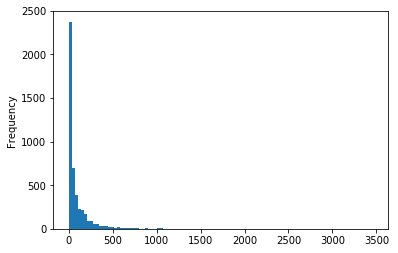

In [61]:
# e.g. calculate counts of reviews per business entity, and plot it
a = df_final["business_id"].value_counts().plot.hist(bins = 100)

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [66]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv("Downloads/dataset/last_2_years_restaurant_reviews.csv")